<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter05/Exercise_5_5_extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5.5: Extended solution

In this notebook, we evaluate the convergence of MC estimation (first-visit and every-visit) of $\mathbf E[G]$.

Note that the exact answer to this problem is:

$$
\mathbf E[G] = \sum_{n=0}^\infty np^n(1-p) = p(1-p)\sum_{n=1}^\infty np^{n-1}
= p(1-p)\frac{1}{(1-p)^2}=\frac{p}{1-p}
$$

In [0]:
import numpy as np
from numpy import random
from pandas import DataFrame

First, we define the model (simulator).

In [0]:
def trial(p):
  n = 0
  while True:
    if random.random() < 1-p:
      return n
    n += 1

We calculate the squared error of estimated $\mathbf E[G]$ in each step (episode).

In [0]:
def run_estimate(p, l, every_visit=False):
  c = 0
  q = 0
  estimate = []
  for _ in range(l):
    r = trial(p)
    if every_visit:
      for i in range(r+1):
        c += 1
        q += (i - q)/c
    else:
      c += 1
      q += (r - q)/c
    se = (q - p/(1-p))**2
    estimate.append(se)
  return np.array(estimate)

We run the MC estimation `repeat` times and take average.

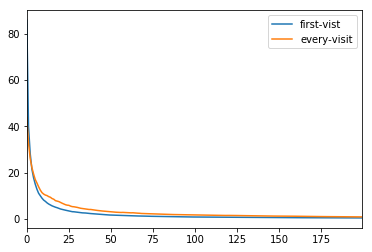

In [0]:
p = 0.9
l = 200
repeat = 1000

estimate1 = np.zeros(l)
for _ in range(repeat):
  estimate1 += run_estimate(p, l, False)
estimate1 /= repeat

estimate2 = np.zeros(l)
for _ in range(repeat):
  estimate2 += run_estimate(p, l, True)
estimate2 /= repeat

DataFrame({'first-vist': estimate1,
           'every-visit': estimate2}).plot()